<h2>Simple Crypto_currency trading strategy using moving average</h2>

1. Making the imports and collecting data:

In [1]:
#Imports are made and the btc historical one year(26th April 2021 - 26th April 2022) Daily data is read from a csv file
#downloaded from Yahoo finance

import numpy as np
import pandas as pd
import bs4
import requests
import regex as re
import matplotlib.pyplot as plt

%matplotlib inline

btc_usd_df = pd.read_csv('C:\\Users\\subhr\\Desktop\\stock_prediction\\BTC-USD.csv')

In [2]:
btc_usd_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757


2. Extracting the insights: 

In [3]:
#Insight 1 - The annual change shows a 28.92% drop in the value of a bitcoin over a period of one year.

annual_change = ((btc_usd_df['Close'][btc_usd_df.shape[0]-1]-btc_usd_df['Close'][0])/btc_usd_df['Close'][0])*100
print(f'Annual change:{annual_change.round(2)}%')

Annual change:-28.92%


(array([112.,  82.,  67.,  31.,  28.,  12.,  10.,   7.,  10.,   2.,   2.,
          2.,   0.,   0.,   0.,   1.]),
 array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
        5500, 6000, 6500, 7000, 7500, 8000]),
 <BarContainer object of 16 artists>)

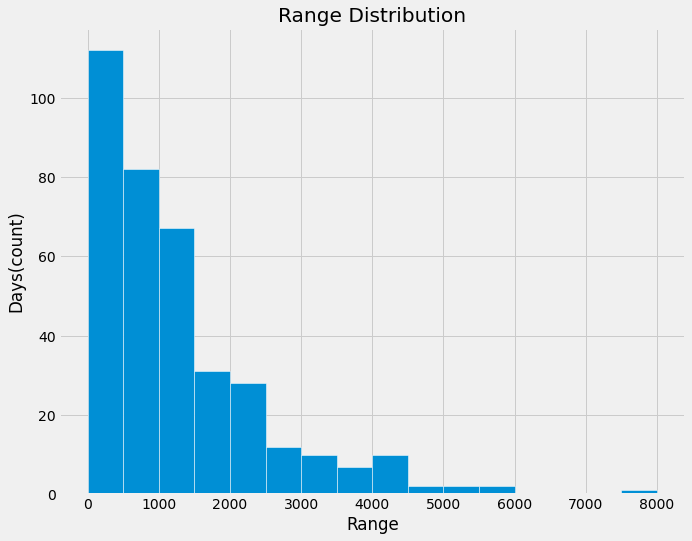

In [4]:
#Insight 2 - For most part of the year the Daily Range of the btc remains within 1000 USD .Only around 10% of the year the range 
#is above 3000 USD

btc_usd_df['Range'] =np.abs(btc_usd_df['Close'] - btc_usd_df['Open'])
Bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
plt.xlabel('Range')
plt.ylabel('Days(count)')
#plt.xticks(Bins,rotation ='horizontal')
plt.title('Range Distribution')
plt.hist(btc_usd_df['Range'],bins =Bins,edgecolor="white")

In [5]:
#Insight 3 - It gives the max,min & distribution of all the values.

btc_usd_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Range
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,45393.011276,46520.646810,44092.554554,45353.015198,45353.015198,3.457336e+10,1249.027413
std,8594.665725,8699.964424,8512.986430,8586.857876,8586.857876,1.364975e+10,1196.229115
min,29796.285156,31006.187500,28893.621094,29807.347656,29807.347656,1.373656e+10,6.066406
25%,39111.136719,39965.559570,37812.997070,39099.681641,39099.681641,2.610734e+10,386.527344
50%,43835.697266,44731.898438,42708.593750,43794.505860,43794.505860,3.237540e+10,910.171875
75%,49652.822266,50896.430664,48434.727539,49501.823242,49501.823242,3.872233e+10,1719.315430
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,1.263581e+11,7563.996094


3. Calculating 50 days closing price Moving Average(MA),plotting the MA and deriving new columns:

In [6]:
#i. - Calculated 50 days moving average and created a list 'MA_50'

MA_window = 50
MA_50 = []

for i in range(0,btc_usd_df.shape[0]):
    if i<50:
        MA_50.append(np.mean(btc_usd_df.iloc[0:i+1,-3]))
    else:
        MA_50.append(np.mean(btc_usd_df.iloc[i-MA_window+1:i+1,-3]))
        

btc_usd_df['MA_50'] = MA_50
btc_usd_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Range,MA_50
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,4943.960937,54021.753906
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,1002.812500,54527.435547


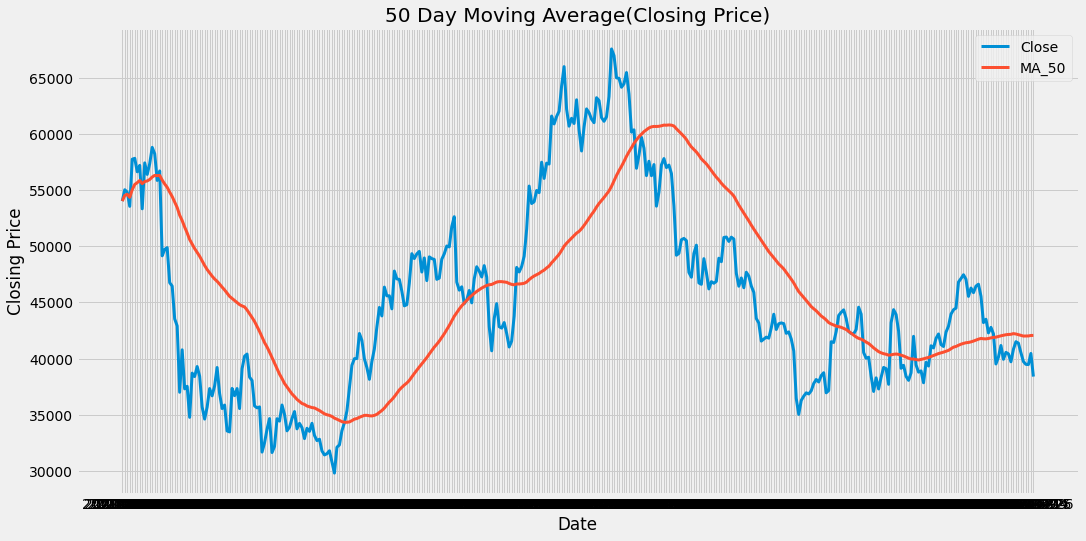

In [7]:
#Plotted the Closing price and its 50 day moving average.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(btc_usd_df['Date'],btc_usd_df['Close'],linewidth=3,label='Close')
plt.plot(btc_usd_df['Date'],btc_usd_df['MA_50'],linewidth=3,label='MA_50')
plt.title("50 Day Moving Average(Closing Price)")
plt.legend()

In [8]:
#ii.- Created a new variable 'MA_50_Signal' indicating if the close price is above or below 'MA_50' using (1 for above, 0 for below)

def signal(X,Y):
    if X>Y:
        return 1
    else:
        return 0


btc_usd_df['MA_50_Signal']= btc_usd_df.apply(lambda x : signal(x['Close'],x['MA_50']),axis =1)
btc_usd_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Range,MA_50,MA_50_Signal
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,4943.960937,54021.753906,0
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,1002.812500,54527.435547,1


In [9]:
#iii.- Created a new list 'Daily_Returns' indicating the daily percentage change in close prices

daily_ret = []

for i in range(0,btc_usd_df.shape[0]):
    if i == 0:
        daily_ret.append(0)
    else:
        change = btc_usd_df['Close'][i]-btc_usd_df['Close'][i-1]
        change_cent = (change/btc_usd_df['Close'][i])*100
        daily_ret.append(change_cent.round(4))

btc_usd_df['Daily_Returns'] = daily_ret
btc_usd_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Range,MA_50,MA_50_Signal,Daily_Returns
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,4943.960937,54021.753906,0,0.0000
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,1002.812500,54527.435547,1,1.8377


In [10]:
#iv.- Created a new dataframe column 'Strategy_Returns' by multiplying the 'MA_50_Signal' with 'Daily_Returns

btc_usd_df['Strategy_Returns'] = btc_usd_df['MA_50_Signal']*btc_usd_df['Daily_Returns']
btc_usd_df['Strategy_Returns']=btc_usd_df['Strategy_Returns'].round(3)
btc_usd_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Range,MA_50,MA_50_Signal,Daily_Returns,Strategy_Returns
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,4943.960937,54021.753906,0,0.0000,0.000
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,1002.812500,54527.435547,1,1.8377,1.838
2,2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955,211.933594,54626.524740,1,-0.3801,-0.380
3,2021-04-29,54858.089844,55115.843750,52418.027344,53555.109375,53555.109375,46088929780,1302.980469,54358.670899,0,-2.3706,-0.000
4,2021-04-30,53568.664063,57900.718750,53129.601563,57750.175781,57750.175781,52395931985,4181.511718,55036.971875,1,7.2642,7.264


In [11]:
#Droped an irrelevant column

btc_usd_df.drop('Adj Close',axis=1,inplace=True)

4. Writing and testing a function to implement a simple strategy based on MA for trading crypto currencies:

In [12]:
btc_usd_df[['Strategy','Investment_value']] = ""

In [13]:
"""
v. Created a new function called 'TestStrategy' that takes (start date, end date, investment amount and above dataframe 
as input) and plot the daily value of investment for 'BuyHold' (using 'Daily_Returns') and 'Strategy' 
(using'Strategy_Returns')

'BuyHold' is where the signal is 1 for all days and will be used as benchmark
"""
"""
Strategy:Whenever the closing price is crossing over 50 MA ,we are going for buy and hold.Again as soon as the closing price 
is crossing MA 50 and going under it ,we are closing the position. MA_50 is kind of indicating the direction of the price 
movement of the coin in the future.

"""

def TestStrategy(start_date, end_date,investment_amount,df):
    start =df[df['Date']==start_date].index[0]
    end = df[df['Date']==end_date].index[0]
    df['Investment_value'] = investment_amount
    for i in range(start,end):
            if i==0:
                df.iloc[0:1,11]='Wait'
            elif df['MA_50_Signal'][i]==1:
                df.iloc[i:i+1,11] ='BuyHold'
                df.iloc[i:i+1,12] = df['Investment_value'][i-1]+((df['Investment_value'][i-1] * df['Strategy_Returns'][i])/100)
            elif df['MA_50_Signal'][i]==0:
                if df['MA_50_Signal'][i-1]==1:
                    df.iloc[i:i+1,11] = 'close Position'
                    df.iloc[i:i+1,12] = df['Investment_value'][i-1]+((df['Investment_value'][i-1] * df['Strategy_Returns'][i])/100)
                else:
                    df.iloc[i:i+1,11]='Wait'
                    df.iloc[i:i+1,12] = df['Investment_value'][i-1]
    df = df.iloc[start:end,:]
    return df                   

In [14]:
#Testing the function with an initial investment of 200000 USD

start_date = '2021-04-28'
end_date = '2021-09-27'
investment_amount = 200000
df_new =TestStrategy(start_date,end_date,investment_amount,btc_usd_df) 

In [15]:
df_new.tail()

,Date,Open,High,Low,Close,Volume,Range,MA_50,MA_50_Signal,Daily_Returns,Strategy_Returns,Strategy,Investment_value
149,2021-09-22,40677.953125,43978.621094,40625.632813,43574.507813,38139709246,2896.554688,46711.150313,0,6.6113,0.0,Wait,318749.147555
150,2021-09-23,43560.296875,44942.175781,43109.339844,44895.097656,34244064430,1334.800781,46814.102188,0,2.9415,0.0,Wait,318749.147555
151,2021-09-24,44894.300781,45080.492188,40936.558594,42839.750000,42839345714,2054.550781,46853.506094,0,-4.7978,-0.0,Wait,318749.147555
152,2021-09-25,42840.890625,42996.257813,41759.921875,42716.593750,31604717236,124.296875,46851.507969,0,-0.2883,-0.0,Wait,318749.147555
153,2021-09-26,42721.628906,43919.300781,40848.460938,43208.539063,30661222077,486.910157,46824.562734,0,1.1385,0.0,Wait,318749.147555


5. Webscraping the top 20 crypto currencies in the market:

In [16]:
#Webscrabed the top 20 cryptocurrencies from the url mentioned below

url = "https://rickorford.com/top-20-cryptocurrencies-to-invest/"
page = requests.get(url)
page_soup = bs4.BeautifulSoup(page.text,'lxml')

headers = page_soup.find_all(id=re.compile("^[1-9]"))
crypto_curr = []
for i in headers:
    crypto_curr.append(i.text)


In [17]:
crypto_curr

['1). Bitcoin\xa0',
 '2). Ethereum (ETH)',
 '3). XRP\xa0',
 '4). Stellar (XLM)',
 '5). Cardano (ADA)',
 '6). Dogecoin (DOGE)',
 '7). Polkadot (DOT)',
 '8). Neo\xa0',
 '9). Celsius (CEL)',
 '10). Nano\xa0',
 '11). Tether (USDT)',
 '12). Dash (DASH)',
 '13). TRON\xa0',
 '14). Zcash (ZEC)',
 '15). NEM\xa0',
 '16). Binance Coin (BNB)',
 '17). Bitcoin SV',
 '18). EOS Coin\xa0',
 '19). VeChain\xa0',
 '20). Dai\xa0']

In [18]:
curr = ['Bitcoin','Ethereum','XRP','Stellar','Cardano','Dogecoin','Polkadot','Neo','Celsius','Nano','Tether','Dash',
                'TRON','Zcash','NEM','Binance Coin','Bitcoin SV','EOS Coin','VeChain','Dai']

6. Creating a class to generalize the functions used above for currency trading and testing the instance and static methods of the same:

In [19]:
#Created a class to generalize all the functionalities defined in previous lines


class Currency_trading:
    #Initialization method
    def __init__(self,path,MA_period,start_date, end_date,investment_amount):
        self.df = pd.read_csv(path)
        self.MA_window = MA_period
        self.start = start_date
        self.end = end_date
        self.inv = investment_amount
     
    #Daily_return instance method
    def Daily_return(self):
        daily_ret = []
        for i in range(0,self.df.shape[0]):
            if i == 0:
                daily_ret.append(0)
            else:
                change = self.df['Close'][i]-self.df['Close'][i-1]
                change_cent = (change/self.df['Close'][i])*100
                daily_ret.append(change_cent.round(4))
        self.df['Daily_Returns'] = daily_ret
        return self.df
    
    #Closing_MA instance method
    def Closing_MA(self):
        MA = []
        for i in range(0,self.df.shape[0]):
            if i<self.MA_window :
                MA.append(np.mean(self.df.iloc[0:i+1,-3]))
            else:
                MA.append(np.mean(self.df.iloc[i-self.MA_window+1:i+1,-3]))
        self.df["MA_"+str(self.MA_window)] = MA
        return self.df
    
    #signal static method
    @staticmethod
    def signal(X,Y):
        if X>Y:
            return 1
        else:
            return 0
    
    #MA_signal instance method
    def MA_signal(self):
        self.df["MA_"+str(self.MA_window)+"_Signal"]= self.df.apply(lambda x : Currency_trading.signal(x['Close'],x["MA_"+str(self.MA_window)]),axis =1)
        return self.df
    
    #Strategy_return instance method
    def Strategy_return(self):
        self.df['Strategy_Returns'] = self.df["MA_"+str(self.MA_window)+"_Signal"]*self.df['Daily_Returns']
        self.df['Strategy_Returns'] = self.df['Strategy_Returns'].round(3)
        return self.df
    
    #TestStrategy instance method
    def TestStrategy(self):
        self.df[['Strategy','Investment_value']]=''
        first =self.df[self.df['Date']==self.start].index[0]
        last = self.df[self.df['Date']==self.end].index[0]
        self.df['Investment_value'] = self.inv
        for i in range(first,last):
            if i==0:
                self.df.iloc[0:1,11]='Wait'
            elif self.df["MA_"+str(self.MA_window)+"_Signal"][i]==1:
                self.df.iloc[i:i+1,11] ='BuyHold'
                self.df.iloc[i:i+1,12] = self.df['Investment_value'][i-1]+((self.df['Investment_value'][i-1] * self.df['Strategy_Returns'][i])/100)
            elif self.df["MA_"+str(self.MA_window)+"_Signal"][i]==0:
                if self.df["MA_"+str(self.MA_window)+"_Signal"][i-1]==1:
                    self.df.iloc[i:i+1,11] = 'close Position'
                    self.df.iloc[i:i+1,12] = self.df['Investment_value'][i-1]+((self.df['Investment_value'][i-1] * self.df['Strategy_Returns'][i])/100)
                else:
                    self.df.iloc[i:i+1,11]='Wait'
                    self.df.iloc[i:i+1,12] = self.df['Investment_value'][i-1]
        self.df = self.df.iloc[first:last,:]
        return self.df 




In [20]:
path = 'C:\\Users\\subhr\\Desktop\\stock_prediction\\BTC-USD.csv'
start_date = '2021-04-28'
end_date = '2021-09-27'

#Class instance or object
btc_trading = Currency_trading(path,30,start_date,end_date,200000)


In [21]:
btc_trading.df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757
2,2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955
3,2021-04-29,54858.089844,55115.843750,52418.027344,53555.109375,53555.109375,46088929780
4,2021-04-30,53568.664063,57900.718750,53129.601563,57750.175781,57750.175781,52395931985
...,...,...,...,...,...,...,...
361,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313,39740.320313,28011716745
362,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249
363,2022-04-24,39478.375000,39845.925781,39233.539063,39469.292969,39469.292969,17964398167
364,2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,40458.308594,35445730570


In [22]:
btc_trading.Closing_MA()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,54021.753906
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,54527.435547
2,2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955,54626.524740
3,2021-04-29,54858.089844,55115.843750,52418.027344,53555.109375,53555.109375,46088929780,54358.670899
4,2021-04-30,53568.664063,57900.718750,53129.601563,57750.175781,57750.175781,52395931985,55036.971875
...,...,...,...,...,...,...,...,...
361,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313,39740.320313,28011716745,43233.806901
362,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249,43084.666797
363,2022-04-24,39478.375000,39845.925781,39233.539063,39469.292969,39469.292969,17964398167,42922.018880
364,2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,40458.308594,35445730570,42787.268229


In [23]:
btc_trading.Daily_return()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,Daily_Returns
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,54021.753906,0.0000
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,54527.435547,1.8377
2,2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955,54626.524740,-0.3801
3,2021-04-29,54858.089844,55115.843750,52418.027344,53555.109375,53555.109375,46088929780,54358.670899,-2.3706
4,2021-04-30,53568.664063,57900.718750,53129.601563,57750.175781,57750.175781,52395931985,55036.971875,7.2642
...,...,...,...,...,...,...,...,...,...
361,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313,39740.320313,28011716745,43233.806901,-1.9805
362,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249,43084.666797,-0.6422
363,2022-04-24,39478.375000,39845.925781,39233.539063,39469.292969,39469.292969,17964398167,42922.018880,-0.0442
364,2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,40458.308594,35445730570,42787.268229,2.4445


In [24]:
btc_trading.MA_signal()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,Daily_Returns,MA_30_Signal
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,54021.753906,0.0000,0
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,54527.435547,1.8377,1
2,2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955,54626.524740,-0.3801,1
3,2021-04-29,54858.089844,55115.843750,52418.027344,53555.109375,53555.109375,46088929780,54358.670899,-2.3706,0
4,2021-04-30,53568.664063,57900.718750,53129.601563,57750.175781,57750.175781,52395931985,55036.971875,7.2642,1
...,...,...,...,...,...,...,...,...,...,...
361,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313,39740.320313,28011716745,43233.806901,-1.9805,0
362,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249,43084.666797,-0.6422,0
363,2022-04-24,39478.375000,39845.925781,39233.539063,39469.292969,39469.292969,17964398167,42922.018880,-0.0442,0
364,2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,40458.308594,35445730570,42787.268229,2.4445,0


In [25]:
btc_trading.Strategy_return()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,Daily_Returns,MA_30_Signal,Strategy_Returns
0,2021-04-26,49077.792969,54288.003906,48852.796875,54021.753906,54021.753906,58284039825,54021.753906,0.0000,0,0.000
1,2021-04-27,54030.304688,55416.964844,53319.187500,55033.117188,55033.117188,49448222757,54527.435547,1.8377,1,1.838
2,2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955,54626.524740,-0.3801,1,-0.380
3,2021-04-29,54858.089844,55115.843750,52418.027344,53555.109375,53555.109375,46088929780,54358.670899,-2.3706,0,-0.000
4,2021-04-30,53568.664063,57900.718750,53129.601563,57750.175781,57750.175781,52395931985,55036.971875,7.2642,1,7.264
...,...,...,...,...,...,...,...,...,...,...,...
361,2022-04-22,40525.863281,40777.757813,39315.417969,39740.320313,39740.320313,28011716745,43233.806901,-1.9805,0,-0.000
362,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249,43084.666797,-0.6422,0,-0.000
363,2022-04-24,39478.375000,39845.925781,39233.539063,39469.292969,39469.292969,17964398167,42922.018880,-0.0442,0,-0.000
364,2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,40458.308594,35445730570,42787.268229,2.4445,0,0.000


In [26]:
btc_trading.TestStrategy()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_30,Daily_Returns,MA_30_Signal,Strategy_Returns,Strategy,Investment_value
2,2021-04-28,55036.636719,56227.207031,53887.917969,54824.703125,54824.703125,48000572955,54626.524740,-0.3801,1,-0.380,BuyHold,199240.000000
3,2021-04-29,54858.089844,55115.843750,52418.027344,53555.109375,53555.109375,46088929780,54358.670899,-2.3706,0,-0.000,close Position,199240.000000
4,2021-04-30,53568.664063,57900.718750,53129.601563,57750.175781,57750.175781,52395931985,55036.971875,7.2642,1,7.264,BuyHold,213712.793600
5,2021-05-01,57714.664063,58448.339844,57052.273438,57828.050781,57828.050781,42836427360,55502.151693,0.1347,1,0.135,BuyHold,214001.305871
6,2021-05-02,57825.863281,57902.593750,56141.906250,56631.078125,56631.078125,38177405335,55663.426897,-2.1136,1,-2.114,BuyHold,209477.318265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2021-09-22,40677.953125,43978.621094,40625.632813,43574.507813,43574.507813,38139709246,47350.977734,6.6113,0,0.000,Wait,399949.062380
150,2021-09-23,43560.296875,44942.175781,43109.339844,44895.097656,44895.097656,34244064430,47257.277083,2.9415,0,0.000,Wait,399949.062380
151,2021-09-24,44894.300781,45080.492188,40936.558594,42839.750000,42839.750000,42839345714,47053.242448,-4.7978,0,-0.000,Wait,399949.062380
152,2021-09-25,42840.890625,42996.257813,41759.921875,42716.593750,42716.593750,31604717236,46912.388281,-0.2883,0,-0.000,Wait,399949.062380
